<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/2_stratified_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://www.analyseup.com/python-machine-learning/stratified-kfold.html

-------------------

- target here is the Returned_Units column which will be either 1 or 0.

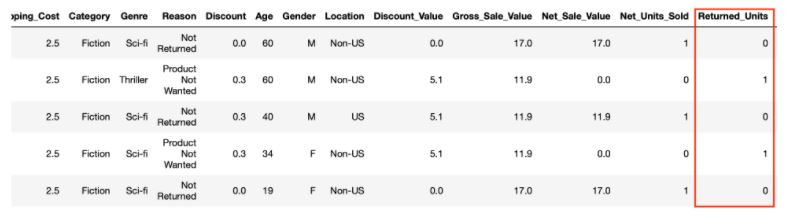

- Let’s have a quick check to see what the class ratio looks like for this column.

In [ ]:
print('Class Ratio:', sum(df['Returned_Units'])/len(df['Returned_Units']))

> Class Ratio: 0.216

- As you can see in our data, **21.6%** of the time a **product is returned**. When we create our folds we want **each split to have this same percentage of returns.**

-----------------------